In [ ]:
import cv2
# I am importing the cv2 library. Reference: https://pypi.org/project/opencv-python/
import numpy as np
# I am importing the numpy library. Reference: https://numpy.org/
import matplotlib.pyplot as plt
# I am importing the matplotlib library. Reference: https://matplotlib.org/

import keras
#
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model
from tensorflow.keras.utils import plot_model
from google.colab.patches import cv2_imshow

In [ ]:
# load the data
(x_train, y_train), (x_test, y_test)  = mnist.load_data()
# I am creating a couple of tuples of my variables for my training and testing data.

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# create the paramaters now so we can just call them later
batch_size = 128
epochs = 5

In [ ]:
# predefine the image rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

In [ ]:
# reshape to be input vectors
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [ ]:
# making the training values in a specific way
# those input vectors will now be the input shape
input_shape = (img_rows, img_cols, 1)

In [ ]:
# make data type float32
# difference between 64 and 32 is the decimal points
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# normalize the data
# making between 0 thru 255 only 1 layer instead of 3
x_train /= 255
x_test /= 255

In [ ]:
# look at the samples
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# classify
# make sure NL classifies between 0 and 9
# if it a 0 tell me it is a 0 based on the image
# make sure you turn this into some type of class
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# how many classes do we have
print ("Number of Classes: " + str(y_test.shape[1]))

Number of Classes: 10


In [ ]:
# the pixels times the classes by the train shape
# number of pixels in each image
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

In [ ]:
# creating our model
# each .add() is a layer
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# compilation
model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])

In [ ]:
# take a look at how the model looks
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

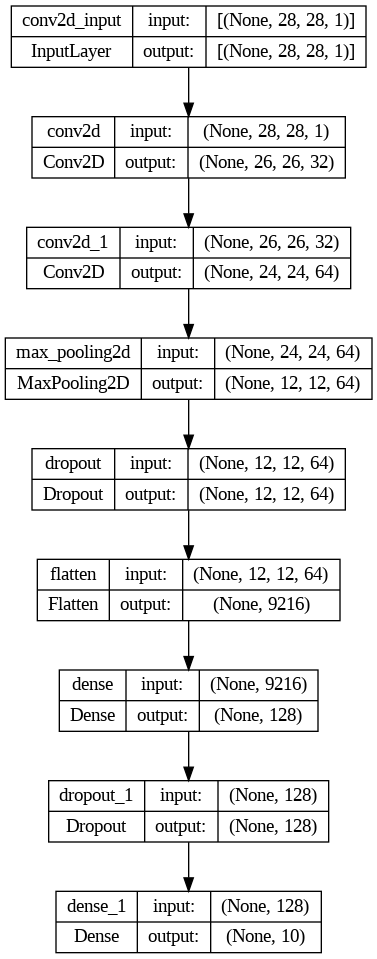

In [ ]:
# look at the plotting
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# training
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 157s 332ms/step - loss: 2.2886 - accuracy: 0.1341 - val_loss: 2.2579 - val_accuracy: 0.3359
Epoch 2/5
469/469 [==============================] - 159s 339ms/step - loss: 2.2369 - accuracy: 0.2428 - val_loss: 2.1960 - val_accuracy: 0.4996
Epoch 3/5
469/469 [==============================] - 162s 346ms/step - loss: 2.1720 - accuracy: 0.3462 - val_loss: 2.1092 - val_accuracy: 0.5764
Epoch 4/5
469/469 [==============================] - 157s 335ms/step - loss: 2.0778 - accuracy: 0.4310 - val_loss: 1.9869 - val_accuracy: 0.6468
Epoch 5/5
469/469 [==============================] - 174s 370ms/step - loss: 1.9523 - accuracy: 0.4978 - val_loss: 1.8253 - val_accuracy: 0.7015


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.8253320455551147
Test accuracy: 0.7014999985694885


In [ ]:
model.save('digits.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# make sure every hand written object is pulling the contour
# create a contour for each 
def x_cord_contour(contour):
    M = cv2.moments(contour)
    return (int(M['m10']/M['m00']))

In [ ]:
def makeSquare(not_square):
    BLACK = [0,0,0]
    img_dim = not_square.shape
    height = img_dim[0]
    width = img_dim[1]
    if (height == width):
        square = not_square
        return square
    else:
        doublesize = cv2.resize(not_square,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
        height = height * 2
        width = width * 2
        if (height > width):
            pad = int((height - width)/2)
            doublesize_square = cv2.copyMakeBorder(doublesize,0,0,pad,pad,cv2.BORDER_CONSTANT,value=BLACK)
        else:
            pad = (width - height)/2
            doublesize_square = cv2.copyMakeBorder(doublesize,pad,pad,0,0,\
                                                   cv2.BORDER_CONSTANT,value=BLACK)
    doublesize_square_dim = doublesize_square.shape
    return doublesize_square

In [ ]:
def resize_to_pixel(dimensions, image):
    # This function then re-sizes an image to the specificied dimenions

    buffer_pix = 4
    dimensions  = dimensions - buffer_pix
    squared = image
    r = float(dimensions) / squared.shape[1]
    dim = (dimensions, int(squared.shape[0] * r))
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    img_dim2 = resized.shape
    height_r = img_dim2[0]
    width_r = img_dim2[1]
    BLACK = [0,0,0]
    if (height_r > width_r):
        resized = cv2.copyMakeBorder(resized,0,0,0,1,cv2.BORDER_CONSTANT,value=BLACK)
    if (height_r < width_r):
        resized = cv2.copyMakeBorder(resized,1,0,0,0,cv2.BORDER_CONSTANT,value=BLACK)
    p = 2
    ReSizedImg = cv2.copyMakeBorder(resized,p,p,p,p,cv2.BORDER_CONSTANT,value=BLACK)
    img_dim = ReSizedImg.shape
    height = img_dim[0]
    width = img_dim[1]
    #print("Padded Height = ", height, "Width = ", width)
    return ReSizedImg

In [ ]:
classifier = load_model('digits.h5')

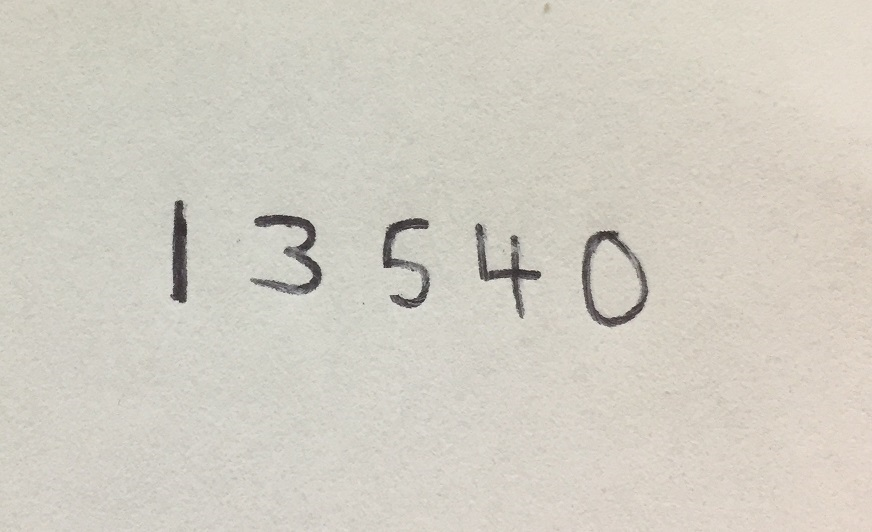

In [ ]:
# look at the image 
image = cv2.imread('/content/numbers1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image)
# cv2.waitKey(0)

In [ ]:
# reducing the blurring in an image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

In [ ]:
# allows computer vision models to find the edges of the object
# the blurring makes those lines more defined
edged = cv2.Canny(blurred, 30, 150)

In [ ]:
# the edges allows us to get the contours of the image
# define variable contours
# also variable underscore (_) we used this when we do not care what that variables hold it is temp place holder
contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# create an empty list
# put those digits it recognizes into this list
full_number = []

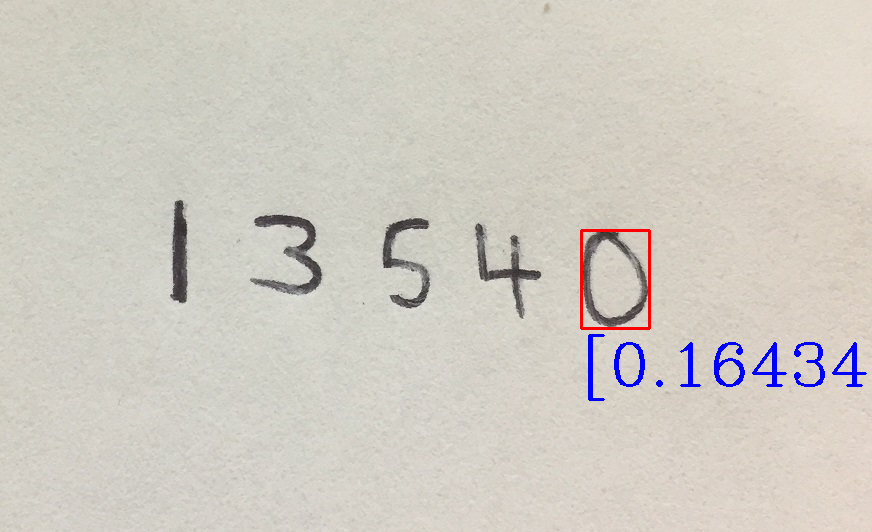

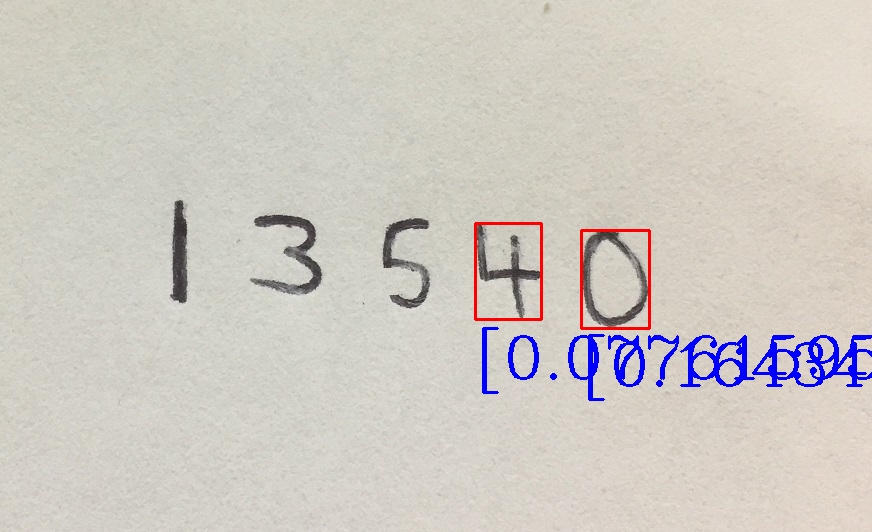

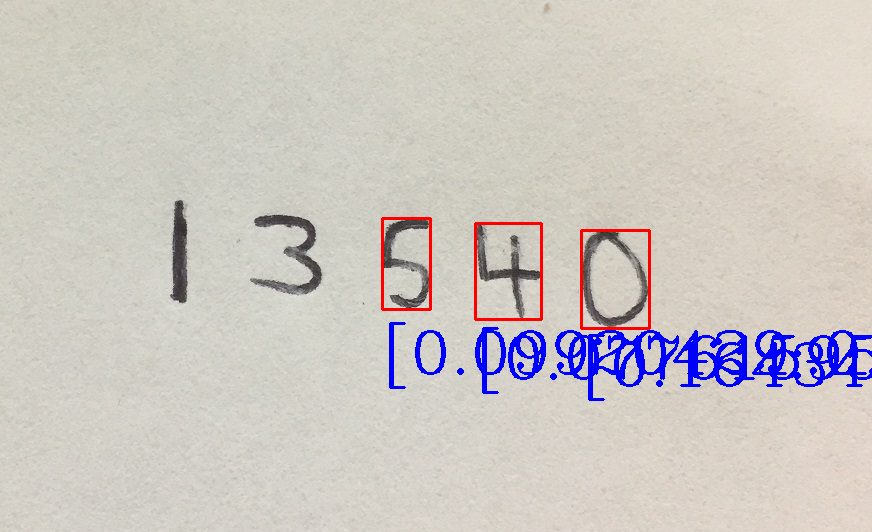

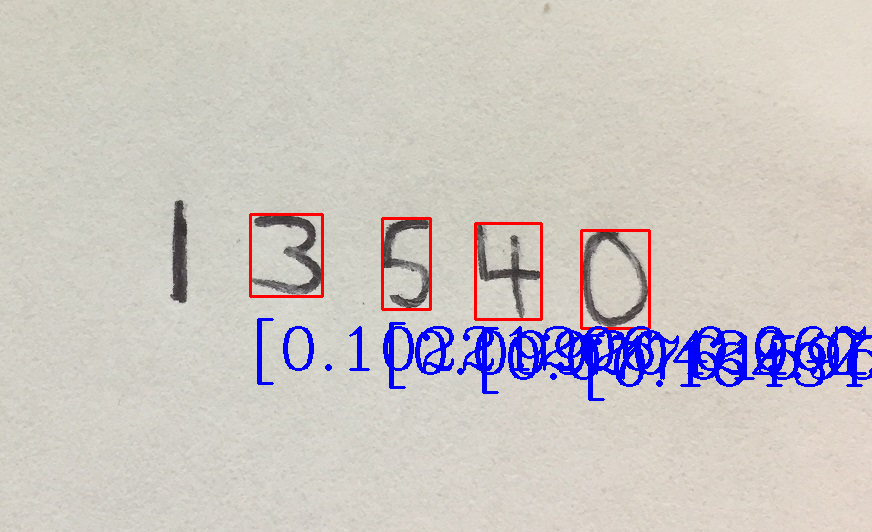

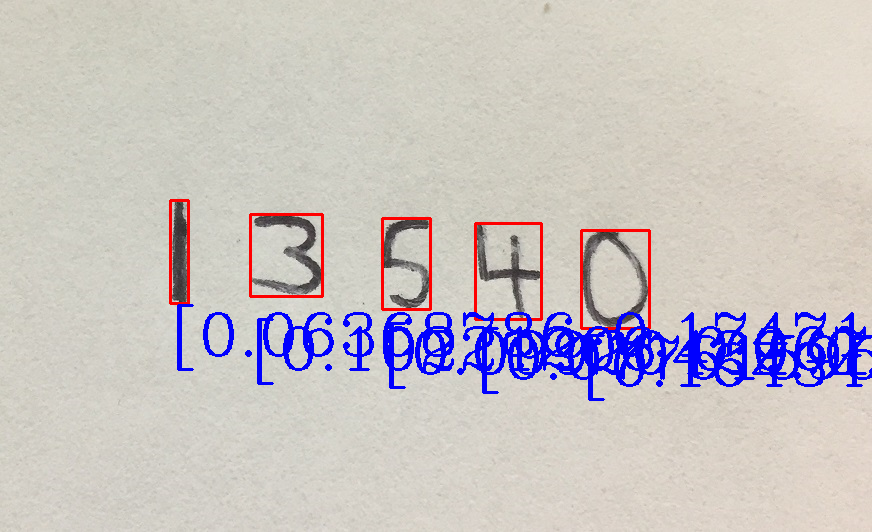

In [ ]:
# for loop goes through the contours we created 
# recognize the digits
for c in contours:
    # compute the bounding box for the rectangle
    (x, y, w, h) = cv2.boundingRect(c)

    if w >= 5 and h >= 25:
        roi = blurred[y:y + h, x:x + w]
        ret, roi = cv2.threshold(roi, 127, 255,cv2.THRESH_BINARY_INV)
        roi = makeSquare(roi)
        roi = resize_to_pixel(28, roi)
        cv2_imshow(roi)
        roi = roi / 255.0
        roi = roi.reshape(1,28,28,1)

        ## Get Prediction
        res = str(classifier.predict(roi, 1, verbose = 0)[0])
        full_number.append(res)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(image, res, (x , y + 155), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 2)
        cv2_imshow(image)
        cv2.waitKey(0)

cv2.destroyAllWindows()